# Data Scrapping and wrangling

In [1]:
!pip install selenium

In [2]:
from selenium import webdriver

In [3]:
import os
os.getcwd()

'D:\\Manipal Pro learn\\Term1\\DataScrapping'

In [4]:
browser = webdriver.Chrome('chromedriver.exe')

In [5]:
url = 'https://en.wikipedia.org/wiki/Data_science'
browser.get(url)

# Scrape paragraphs

In [6]:
ptags = browser.find_elements_by_css_selector('p')
len(ptags)

18

In [7]:
for tag in ptags:
    print(tag.text)

The Wikimedia Foundation wants to make talk pages accessible to all, to improve the depth, quality and the health on the wikis.
We invite all Wikimedians to consult on how to achieve this goal. Join us!

Data science is a multi-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from data in various forms, both structured and unstructured,[1][2] similar to data mining.
Data science is a "concept to unify statistics, data analysis, machine learning and their related methods" in order to "understand and analyze actual phenomena" with data.[3] It employs techniques and theories drawn from many fields within the context of mathematics, statistics, information science, and computer science.
Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information te

In [8]:
ptags_text = ''
for tag in ptags:
    ptags_text += ' ' + tag.text
len(ptags_text)

11799

In [14]:
#alternate
ptags_text = ' '.join([tag.text for tag in ptags])
len(ptags_text)

11798

In [13]:
x = [1,2,3,4,5]
print([i*i for i in x])

x = ['a','b','c','d']
' '.join(x)


[1, 4, 9, 16, 25]


'a b c d'

In [15]:
!pip install wordcloud

In [16]:
from wordcloud import WordCloud
%matplotlib inline



NameError: name 'plt' is not defined

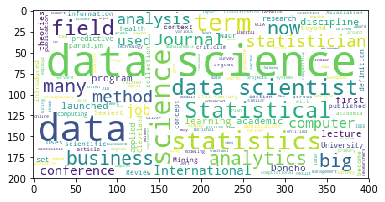

In [18]:
import matplotlib.pyplot as plt
wc =WordCloud(background_color='white').generate(ptags_text)
plt.imshow(wc)

In [21]:
browser.get('https://bbc.in/2Ul1Ooj')

In [24]:
ptags = browser.find_elements_by_css_selector('p')
print(len(ptags))
tags = ' '.join([tag.text for tag in ptags])
print(tags)
len(tags)

68
           India made headlines in late September after carrying out "surgical strikes" on militants across the de-facto border in disputed Kashmir. Days earlier insurgents had attacked an army base in Indian-administered Kashmir, killing 18 soldiers. Tensions spiked as India blamed Pakistan. Supporters of the Indian government said the army's strikes had taught Pakistan a long-awaited lesson - but Islamabad dismissed the reports as an "illusion". The BBC's M Ilyas Khan visited the border area to find out what actually happened. India 'launches strikes against militants' Kashmir attack: What's behind the deadliest militant raid in years? Despite the use of the term "surgical strikes", the Indians definitely did not airdrop commandos to hit "launching pads of militants" inside Pakistani-held territory, or conduct ground assaults deep into the Pakistan-administered side. But they did cross the Line of Control (LoC), in some cases by more than a kilometre, to hit nearby Pakistani borde

9953

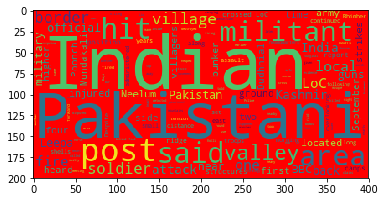

In [28]:
plt.imshow(WordCloud(background_color='red').generate(tags))

In [35]:
browser.get('http://localhost:8000')

In [36]:
ptags = browser.find_elements_by_css_selector('p')
print([tag.get_attribute('class') for tag in ptags])

['batch6', 'batch6']


In [37]:
import pandas as pd

In [44]:
browser.get('http://localhost:8000')


In [45]:
ls = list()
ptags = browser.find_elements_by_css_selector('p')
for tag in ptags:
    ls.append({'tag_name':'p','class':tag.get_attribute('class'),'text':tag.text})
df_paras = pd.DataFrame(ls)
df_paras

,class,tag_name,text
0,batch6,p,Web scraping is a process of collecting inform...
1,batch6,p,We will use selenium to open websites through ...
2,scraping,p,We are learning basics of scraping


In [47]:
#alternate
df_paras = pd.DataFrame()
ptags = browser.find_elements_by_css_selector('p')
for tag in ptags:
    cur_row = {'tag_name':'p','class':tag.get_attribute('class'),'text':tag.text}
    df_paras = df_paras.append(cur_row, ignore_index=True)
df_paras

,class,tag_name,text
0,batch6,p,Web scraping is a process of collecting inform...
1,batch6,p,We will use selenium to open websites through ...
2,scraping,p,We are learning basics of scraping


In [53]:
browser.get('http://localhost:8000')
df_paras = pd.DataFrame()
ptags = browser.find_elements_by_class_name('article')
for tag in ptags:
    cur_row = {'tag_name':'p','class':tag.get_attribute('class'),'text':tag.text}
    df_paras = df_paras.append(cur_row, ignore_index=True)
df_paras

,class,tag_name,text
0,article,p,India won the world cup
1,article,p,India won the match against Pakistan


In [56]:
#alternate
browser.get('http://localhost:8000')
df_paras = pd.DataFrame()
ptags = browser.find_elements_by_css_selector('p.article')
for tag in ptags:
    cur_row = {'tag_name':'p','class':tag.get_attribute('class'),'text':tag.text}
    df_paras = df_paras.append(cur_row, ignore_index=True)
df_paras

,class,tag_name,text
0,article,p,India won the world cup
1,article,p,India won the match against Pakistan
2,article,p,we will be learning univariate analysis
3,article,p,we will also learn bivariate analysis


In [59]:
browser.get('http://localhost:8000')
df_paras = pd.DataFrame()
divtag = browser.find_element_by_css_selector('div.eda')
ptags = divtag.find_elements_by_css_selector('p.article')
for tag in ptags:
    cur_row = {'tag_name':'p','class':tag.get_attribute('class'),'text':tag.text}
    df_paras = df_paras.append(cur_row, ignore_index=True)
df_paras

,class,tag_name,text
0,article,p,we will be learning univariate analysis
1,article,p,we will also learn bivariate analysis


In [60]:
browser.get('http://localhost:8000')
df_paras = pd.DataFrame()
divtag = browser.find_element_by_css_selector('div[name="ml"]')
ptags = divtag.find_elements_by_css_selector('p')
for tag in ptags:
    cur_row = {'tag_name':'p','value':tag.get_attribute('value')}
    df_paras = df_paras.append(cur_row, ignore_index=True)
df_paras

,tag_name,value
0,p,regression
1,p,classification


In [70]:
browser.get('http://localhost:8000')
df_paras = pd.DataFrame()
divtag = browser.find_element_by_css_selector('div.articles')
div_tags = divtag.find_elements_by_css_selector('div.article')
for div_tag in div_tags:
    cur_row = {'title':div_tag.find_element_by_css_selector('p[name="title"]').text,
               'content':div_tag.find_element_by_css_selector('p[name="content"]').text}
    df_paras = df_paras.append(cur_row, ignore_index=True)
df_paras

,content,title
0,India won australia by 60 runs in their first ...,India wins australia
1,AI is going to rule the world,AI is the new era


In [67]:
#alternate - columnwise 
titletag = browser.find_elements_by_css_selector('p[name="title"]')
title = [tag.text for tag in titletag]
contenttag = browser.find_elements_by_css_selector('p[name="content"]')
content = [tag.text for tag in contenttag]
pd.DataFrame({'title':title,'content':content})

,title,content
0,India wins australia,India won australia by 60 runs in their first ...
1,AI is the new era,AI is going to rule the world


In [81]:
#assignment
browser.get('http://localhost:8000')
df_paras = pd.DataFrame()
divtag = browser.find_element_by_css_selector('div.books')
div_tags = divtag.find_elements_by_css_selector('div.book')
for div_tag in div_tags:
    cur_row = {'title':div_tag.find_element_by_css_selector('li.title').text,
               'author':div_tag.find_element_by_css_selector('div.author').text,
               'desc':div_tag.find_element_by_css_selector('div.desc').find_element_by_css_selector('p').text,
               'price':div_tag.find_element_by_css_selector('li[type="price"]').text,
               'category':div_tag.find_element_by_css_selector('div.category').get_attribute('type')
              }
    df_paras = df_paras.append(cur_row, ignore_index=True)
df_paras


,author,category,desc,price,title
0,Dolly,self-help,An inspiring guide from Dolly,10$,The person you mean to be
1,Tom,society,Tom's perspective of global....,15$,Imperfect courange
